In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
dfg = pd.read_csv('wat-good-time-interval-10000.csv')
dfm = pd.read_csv('wat-mal-time-interval-10000.csv')

In [4]:
dfg

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,10000,613,194,105,48,385,110,105,70,264,...,695,711,179,200,613,179,200,699,712,1
1,20000,629,266,202,89,337,122,129,50,175,...,544,700,232,327,629,232,327,540,699,1
2,30000,672,266,172,86,316,108,80,65,200,...,553,586,293,362,672,293,362,553,586,1
3,40000,697,290,196,109,341,115,72,84,236,...,614,639,385,414,697,385,414,614,639,1
4,50000,558,243,152,79,249,102,91,67,165,...,397,436,350,378,557,350,379,397,436,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,3110000,432,186,180,102,234,6,42,78,234,...,408,396,408,396,432,408,396,408,396,1
311,3120000,378,204,198,96,175,6,42,60,163,...,307,369,318,384,378,318,384,308,369,1
312,3130000,559,229,168,102,329,90,96,72,239,...,509,417,498,403,558,498,404,508,417,1
313,3140000,503,269,198,114,210,72,90,96,126,...,324,450,324,449,504,324,448,324,450,1


In [5]:
dfm

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,10000,675,825,201,95,445,521,179,117,300,...,1479,1076,351,393,1246,351,393,1486,1077,0
1,20000,707,860,384,171,419,406,182,76,207,...,1072,1085,453,548,1215,453,548,1067,1084,0
2,30000,776,1015,467,235,375,437,205,169,232,...,1148,1033,723,778,1426,723,778,1146,1034,0
3,40000,782,1027,409,217,418,465,190,142,287,...,1207,1015,806,747,1430,806,747,1207,1019,0
4,50000,690,941,445,242,367,378,198,151,184,...,754,827,654,746,1298,655,748,754,822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,3110000,389,192,138,78,185,6,36,42,185,...,292,317,282,306,389,282,306,292,312,0
311,3120000,405,210,192,114,197,6,42,54,186,...,320,384,324,384,405,324,384,323,384,0
312,3130000,627,288,198,120,337,102,102,96,240,...,538,486,534,486,627,534,486,535,486,0
313,3140000,486,282,228,120,192,66,102,84,109,...,300,459,312,474,486,312,474,301,459,0


In [6]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time_intervals')

In [7]:
df.to_csv('wat-time-pca-10000.csv',index=False)
df = pd.read_csv("wat-time-pca-10000.csv")
df

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
0,10000,613,194,105,48,385,110,105,70,264,...,695,711,179,200,613,179,200,699,712,1
1,10000,675,825,201,95,445,521,179,117,300,...,1479,1076,351,393,1246,351,393,1486,1077,0
2,20000,707,860,384,171,419,406,182,76,207,...,1072,1085,453,548,1215,453,548,1067,1084,0
3,20000,629,266,202,89,337,122,129,50,175,...,544,700,232,327,629,232,327,540,699,1
4,30000,672,266,172,86,316,108,80,65,200,...,553,586,293,362,672,293,362,553,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,3130000,559,229,168,102,329,90,96,72,239,...,509,417,498,403,558,498,404,508,417,1
626,3140000,486,282,228,120,192,66,102,84,109,...,300,459,312,474,486,312,474,301,459,0
627,3140000,503,269,198,114,210,72,90,96,126,...,324,450,324,449,504,324,448,324,450,1
628,3150000,747,369,288,198,366,134,114,90,204,...,492,618,496,621,746,497,621,492,618,1


In [8]:
df.corr()

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target
time_intervals,1.000000,0.126189,-0.024202,0.023317,0.014263,0.156730,0.008746,0.078534,0.134347,0.188715,...,0.092394,0.036279,0.176981,0.093501,0.070297,0.177002,0.093503,0.092382,0.036273,0.000000
r0,0.126189,1.000000,0.880315,0.921483,0.843099,0.967894,0.779053,0.893604,0.843027,0.948662,...,0.920258,0.955375,0.951722,0.968819,0.970715,0.951749,0.968830,0.920094,0.955349,-0.005309
r1,-0.024202,0.880315,1.000000,0.928026,0.874358,0.838893,0.902357,0.820267,0.800133,0.806011,...,0.901315,0.949886,0.851538,0.916082,0.956777,0.851558,0.916106,0.901163,0.949885,-0.053992
r2,0.023317,0.921483,0.928026,1.000000,0.914807,0.862259,0.758288,0.834735,0.780864,0.838658,...,0.855046,0.950114,0.870375,0.960831,0.936627,0.870393,0.960823,0.854758,0.950103,-0.020834
r3,0.014263,0.843099,0.874358,0.914807,1.000000,0.772269,0.739808,0.683599,0.837076,0.754123,...,0.781116,0.911695,0.803435,0.930476,0.853811,0.803472,0.930422,0.780908,0.911616,-0.018737
r4,0.156730,0.967894,0.838893,0.862259,0.772269,1.000000,0.819686,0.936351,0.847388,0.979600,...,0.957884,0.927164,0.968424,0.919094,0.957128,0.968449,0.919087,0.957746,0.927126,-0.007652
r5,0.008746,0.779053,0.902357,0.758288,0.739808,0.819686,1.000000,0.807417,0.811944,0.765015,...,0.901952,0.862797,0.807444,0.791908,0.883655,0.807479,0.791940,0.901946,0.862834,-0.061772
r6,0.078534,0.893604,0.820267,0.834735,0.683599,0.936351,0.807417,1.000000,0.777446,0.885505,...,0.905633,0.869727,0.897488,0.850631,0.916264,0.897516,0.850628,0.905419,0.869793,-0.019972
r7,0.134347,0.843027,0.800133,0.780864,0.837076,0.847388,0.811944,0.777446,1.000000,0.831592,...,0.849926,0.878804,0.872173,0.890207,0.848743,0.872176,0.890231,0.849886,0.878714,-0.014347
r8,0.188715,0.948662,0.806011,0.838658,0.754123,0.979600,0.765015,0.885505,0.831592,1.000000,...,0.952114,0.906422,0.971760,0.904992,0.929269,0.971748,0.904972,0.952092,0.906372,-0.001649


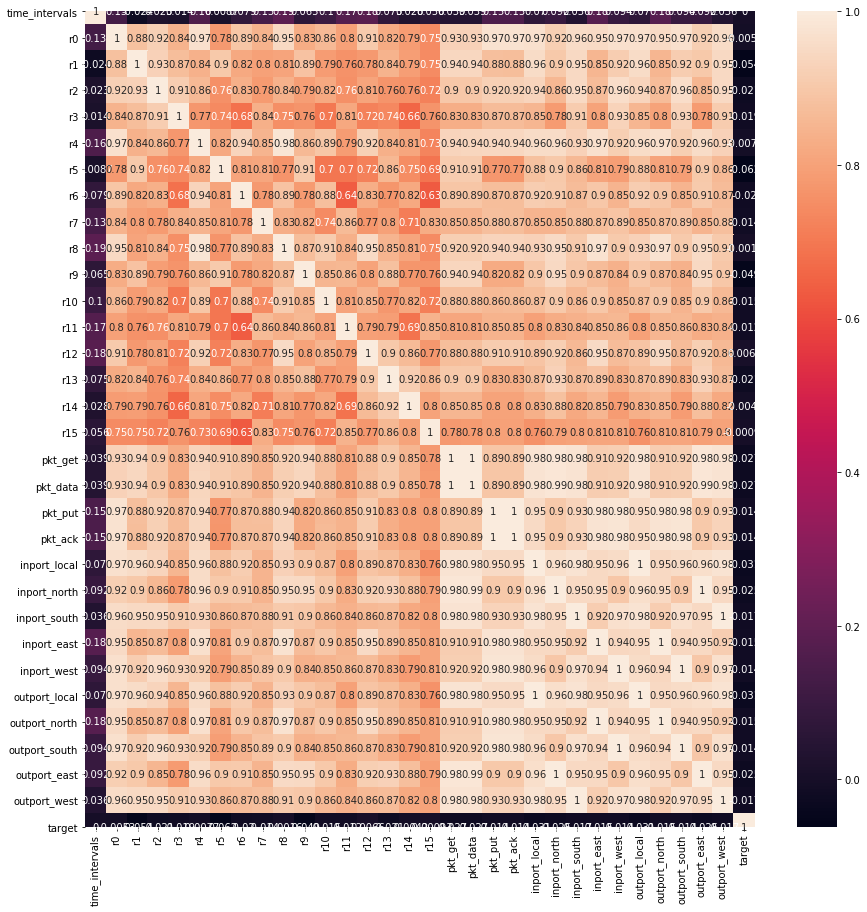

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [47]:
train_X = df.drop(columns=['target','time_intervals'])
train_X

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_local,inport_north,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west
0,613,194,105,48,385,110,105,70,264,153,...,618,695,711,179,200,613,179,200,699,712
1,675,825,201,95,445,521,179,117,300,423,...,1254,1479,1076,351,393,1246,351,393,1486,1077
2,707,860,384,171,419,406,182,76,207,264,...,1209,1072,1085,453,548,1215,453,548,1067,1084
3,629,266,202,89,337,122,129,50,175,86,...,624,544,700,232,327,629,232,327,540,699
4,672,266,172,86,316,108,80,65,200,78,...,672,553,586,293,362,672,293,362,553,586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,559,229,168,102,329,90,96,72,239,59,...,558,509,417,498,403,558,498,404,508,417
626,486,282,228,120,192,66,102,84,109,55,...,487,300,459,312,474,486,312,474,301,459
627,503,269,198,114,210,72,90,96,126,66,...,503,324,450,324,449,504,324,448,324,450
628,747,369,288,198,366,134,114,90,204,98,...,747,492,618,496,621,746,497,621,492,618


In [11]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.720000,0.179298,0.197368,0.186047,0.753425,0.211132,0.475113,0.312500,0.880000,0.361702,...,0.410239,0.469912,0.655300,0.174805,0.215285,0.406768,0.174976,0.215517,0.470390,0.656827
1,0.792941,0.762477,0.377820,0.368217,0.870841,1.000000,0.809955,0.522321,1.000000,1.000000,...,0.833112,1.000000,0.991705,0.342773,0.423036,0.826808,0.343109,0.423491,1.000000,0.993542
2,0.830588,0.794824,0.721805,0.662791,0.819961,0.779271,0.823529,0.339286,0.690000,0.624113,...,0.803191,0.724814,1.000000,0.442383,0.589882,0.806238,0.442815,0.590517,0.718035,1.000000
3,0.738824,0.245841,0.379699,0.344961,0.659491,0.234165,0.583710,0.223214,0.583333,0.203310,...,0.414229,0.367816,0.645161,0.226562,0.351991,0.417386,0.226784,0.352371,0.363392,0.644834
4,0.789412,0.245841,0.323308,0.333333,0.618395,0.207294,0.361991,0.290179,0.666667,0.184397,...,0.446144,0.373901,0.540092,0.286133,0.389666,0.445919,0.286413,0.390086,0.372140,0.540590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.656471,0.211645,0.315789,0.395349,0.643836,0.172745,0.434389,0.321429,0.796667,0.139480,...,0.370346,0.344151,0.384332,0.486328,0.433800,0.370272,0.486804,0.435345,0.341857,0.384686
626,0.570588,0.260628,0.428571,0.465116,0.375734,0.126679,0.461538,0.375000,0.363333,0.130024,...,0.323138,0.202840,0.423041,0.304688,0.510226,0.322495,0.304985,0.510776,0.202557,0.423432
627,0.590588,0.248614,0.372180,0.441860,0.410959,0.138196,0.407240,0.428571,0.420000,0.156028,...,0.333777,0.219067,0.414747,0.316406,0.483315,0.334439,0.316716,0.482759,0.218035,0.415129
628,0.877647,0.341035,0.541353,0.767442,0.716243,0.257198,0.515837,0.401786,0.680000,0.231678,...,0.496011,0.332657,0.569585,0.484375,0.668461,0.495023,0.485826,0.669181,0.331090,0.570111


In [12]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.36316967, -0.48422923,  0.02576275,  0.3725445 ],
       [ 2.89961765, -0.44588594, -0.24547385,  1.66668671],
       [ 2.83868322, -0.05188315,  0.17530797,  1.26904685],
       ...,
       [ 1.17081153,  0.18464899,  0.12237993, -0.03463846],
       [ 1.99513466,  0.16981963,  0.34835654, -0.17569815],
       [ 1.9484025 ,  0.0117875 ,  0.34774455, -0.18453825]])

In [13]:
pca.explained_variance_ratio_

array([0.88877392, 0.03025005, 0.02401688, 0.01834717])

Text(0, 0.5, 'Variance')

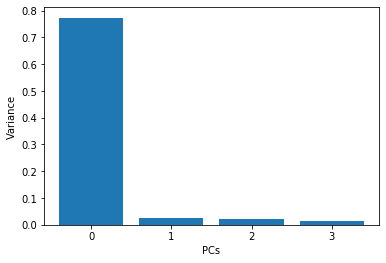

In [14]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [15]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3
0,1.363170,-0.484229,0.025763,0.372544
1,2.899618,-0.445886,-0.245474,1.666687
2,2.838683,-0.051883,0.175308,1.269047
3,1.384750,-0.255065,0.257116,0.365114
4,1.481501,-0.223203,0.025490,0.176787
...,...,...,...,...
625,1.578071,-0.279415,-0.145063,-0.214031
626,1.154100,0.206001,0.187916,-0.017328
627,1.170812,0.184649,0.122380,-0.034638
628,1.995135,0.169820,0.348357,-0.175698


In [16]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,target
0,1.363170,-0.484229,0.025763,0.372544,1
1,2.899618,-0.445886,-0.245474,1.666687,0
2,2.838683,-0.051883,0.175308,1.269047,0
3,1.384750,-0.255065,0.257116,0.365114,1
4,1.481501,-0.223203,0.025490,0.176787,1
...,...,...,...,...,...
625,1.578071,-0.279415,-0.145063,-0.214031,1
626,1.154100,0.206001,0.187916,-0.017328,0
627,1.170812,0.184649,0.122380,-0.034638,1
628,1.995135,0.169820,0.348357,-0.175698,1


In [17]:
final_df.corr()

,0,1,2,3,target
0,1.000000e+00,2.199932e-15,-1.064938e-15,5.321663e-16,-0.016264
1,2.199932e-15,1.000000e+00,6.832152e-17,-4.445913e-16,-0.016647
2,-1.064938e-15,6.832152e-17,1.000000e+00,4.469425e-17,-0.022448
3,5.321663e-16,-4.445913e-16,4.469425e-17,1.000000e+00,-0.065198
target,-1.626370e-02,-1.664703e-02,-2.244825e-02,-6.519783e-02,1.000000


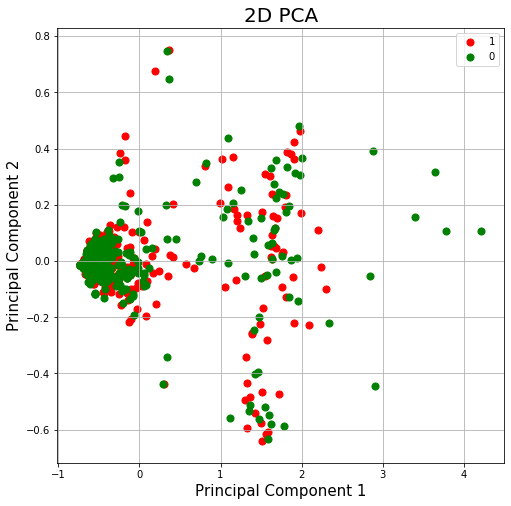

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
train_Y = df['target']

In [20]:
train_Y.value_counts()

1    315
0    315
Name: target, dtype: int64

#### machine learning models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.3, random_state=0, shuffle = True)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [23]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.675884
         Iterations: 35
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.025    
Dependent Variable:    target            AIC:               907.6135 
Date:                  2020-05-02 13:30  BIC:               1032.0937
No. Observations:      630               Log-Likelihood:    -425.81  
Df Model:              27                LL-Null:           -436.68  
Df Residuals:          602               LLR p-value:       0.74987  
Converged:             0.0000            Scale:             1.0000   
No. Iterations:        35.0000                                       
---------------------------------------------------------------------
    Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
0   42.0606  9135751.0009  0.0000 1.0000 -17905700.8728 17905784.9940
1  -69.4803 11629270.8124 -0.0000 1.0000 -22793021.4

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.42
Train Prediction Score 53.28798185941043
Test Prediction  42.32804232804233


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 79   1]
 [108   1]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.99      0.59        80
           1       0.50      0.01      0.02       109

    accuracy                           0.42       189
   macro avg       0.46      0.50      0.30       189
weighted avg       0.47      0.42      0.26       189



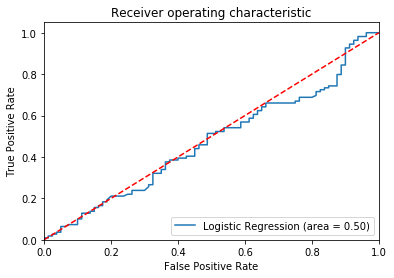

In [28]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred_knn= knn.predict(X_test)

In [31]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 66.89342403628117
Test Prediction  49.735449735449734


In [32]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[44 36]
 [59 50]]


In [33]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        80
           1       0.58      0.46      0.51       109

    accuracy                           0.50       189
   macro avg       0.50      0.50      0.50       189
weighted avg       0.52      0.50      0.50       189



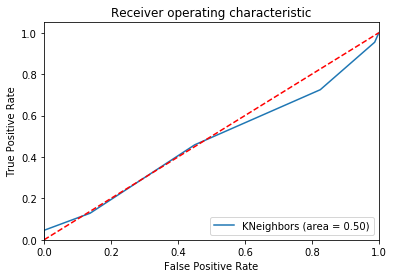

In [34]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [35]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred_nb= nb.predict(X_test)

In [38]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 48.07256235827664
Test Prediction Score 54.4973544973545


In [39]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[ 7 73]
 [13 96]]


In [40]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.35      0.09      0.14        80
           1       0.57      0.88      0.69       109

    accuracy                           0.54       189
   macro avg       0.46      0.48      0.42       189
weighted avg       0.48      0.54      0.46       189



In [41]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [42]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 264 samples, validate on 177 samples
Epoch 1/10
264/264 [==============================] - 1s 3ms/step - loss: 0.7250 - accuracy: 0.4848 - val_loss: 0.6855 - val_accuracy: 0.5537
Epoch 2/10
264/264 [==============================] - 0s 139us/step - loss: 0.7221 - accuracy: 0.4811 - val_loss: 0.6856 - val_accuracy: 0.5480
Epoch 3/10
264/264 [==============================] - 0s 145us/step - loss: 0.7196 - accuracy: 0.4811 - val_loss: 0.6856 - val_accuracy: 0.5480
Epoch 4/10
264/264 [==============================] - 0s 142us/step - loss: 0.7173 - accuracy: 0.4848 - val_loss: 0.6858 - val_accuracy: 0.5480
Epoch 5/10
264/264 [==============================] - 0s 159us/step - loss: 0.7150 - accuracy: 0.4811 - val_loss: 0.6860 - val_accuracy: 0.5480
Epoch 6/10
264/264 [==============================] - 0s 87us/step - loss: 0.7129 - accuracy: 0.4848 - val_loss: 0.6862 - val_accuracy: 0.5480
Epoch 7/10
264/264 [==============================] - 0s 125us/step - loss: 0.7108 - accuracy

In [43]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 264 samples, validate on 177 samples
Epoch 1/20
264/264 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.4735 - val_loss: 0.2487 - val_accuracy: 0.5593
Epoch 2/20
264/264 [==============================] - 0s 169us/step - loss: 0.2537 - accuracy: 0.4735 - val_loss: 0.2487 - val_accuracy: 0.5480
Epoch 3/20
264/264 [==============================] - 0s 74us/step - loss: 0.2536 - accuracy: 0.4811 - val_loss: 0.2487 - val_accuracy: 0.5480
Epoch 4/20
264/264 [==============================] - 0s 104us/step - loss: 0.2535 - accuracy: 0.4848 - val_loss: 0.2488 - val_accuracy: 0.5480
Epoch 5/20
264/264 [==============================] - 0s 97us/step - loss: 0.2533 - accuracy: 0.4924 - val_loss: 0.2488 - val_accuracy: 0.5480
Epoch 6/20
264/264 [==============================] - 0s 64us/step - loss: 0.2532 - accuracy: 0.4924 - val_loss: 0.2488 - val_accuracy: 0.5424
Epoch 7/20
264/264 [==============================] - 0s 61us/step - loss: 0.2531 - accuracy: 0

In [44]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 264 samples, validate on 177 samples
Epoch 1/20
264/264 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.4848 - val_loss: 0.2535 - val_accuracy: 0.4576
Epoch 2/20
264/264 [==============================] - 0s 101us/step - loss: 0.2519 - accuracy: 0.4773 - val_loss: 0.2533 - val_accuracy: 0.4463
Epoch 3/20
264/264 [==============================] - 0s 135us/step - loss: 0.2514 - accuracy: 0.5000 - val_loss: 0.2532 - val_accuracy: 0.4011
Epoch 4/20
264/264 [==============================] - 0s 154us/step - loss: 0.2510 - accuracy: 0.5227 - val_loss: 0.2531 - val_accuracy: 0.4294
Epoch 5/20
264/264 [==============================] - 0s 156us/step - loss: 0.2507 - accuracy: 0.5152 - val_loss: 0.2530 - val_accuracy: 0.4237
Epoch 6/20
264/264 [==============================] - 0s 134us/step - loss: 0.2504 - accuracy: 0.5303 - val_loss: 0.2529 - val_accuracy: 0.4124
Epoch 7/20
264/264 [==============================] - 0s 125us/step - loss: 0.2501 - accurac

In [45]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 264 samples, validate on 177 samples
Epoch 1/20
264/264 [==============================] - 1s 2ms/step - loss: 0.2552 - accuracy: 0.4432 - val_loss: 0.2497 - val_accuracy: 0.5085
Epoch 2/20
264/264 [==============================] - 0s 133us/step - loss: 0.2548 - accuracy: 0.4432 - val_loss: 0.2497 - val_accuracy: 0.5028
Epoch 3/20
264/264 [==============================] - 0s 138us/step - loss: 0.2545 - accuracy: 0.4470 - val_loss: 0.2496 - val_accuracy: 0.4972
Epoch 4/20
264/264 [==============================] - 0s 116us/step - loss: 0.2544 - accuracy: 0.4356 - val_loss: 0.2496 - val_accuracy: 0.4859
Epoch 5/20
264/264 [==============================] - 0s 105us/step - loss: 0.2541 - accuracy: 0.4394 - val_loss: 0.2496 - val_accuracy: 0.4802
Epoch 6/20
264/264 [==============================] - 0s 92us/step - loss: 0.2538 - accuracy: 0.4432 - val_loss: 0.2495 - val_accuracy: 0.4689
Epoch 7/20
264/264 [==============================] - 0s 81us/step - loss: 0.2535 - accuracy:

In [46]:
principal_df[principal_df.duplicated()].shape

(97, 4)